In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.special

In [2]:
def plot_permutation(P):
    n = len(P)
    x_values = [i for i in range(n)]
    y_values = P
    plt.scatter(x_values,y_values, label = str(P))

In [3]:
def unrank_permutation(n_list,d):
    n = len(n_list)
    nn_list = [h for h in n_list]
    if d == 0:
        return nn_list
    for k in range(n):
        if d < (k+1)*np.math.factorial(n-1):
            nn_list.remove(n_list[k])
            return [n_list[k]] + unrank_permutation(nn_list,d - k*np.math.factorial(n-1)) 

In [4]:
def unrank_binomial(n,k,d):
    if n == 0:
        return ""
    C = scipy.special.binom(n-1,k)
    if d < C:
        return "0" + unrank_binomial(n-1,k,d)
    else:
        return "1" + unrank_binomial(n-1,k-1,d-C)

In [5]:
unrank_binomial(9,4,70)

'100000111'

In [6]:
def relative_order(p):
    '''takes a list of n distinct integers and returns the permutation from 0 to n-1 with the same relative order.'''
    n = len(p)
    SP = sorted(p)
    output = [0]*n
    for i in range(n):
        ind = SP.index(p[i])
        output[i] = ind
    return output

In [7]:
def count_different_patterns(P,k):
    """counts the number of different patterns of length k in permutation P"""
    count = 0
    pattern_hash = defaultdict(int)
    n = len(P)
    C = scipy.special.binom(n,k)
    for i in range(int(C)):
        fbs = unrank_binomial(n,k,i)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if pattern_hash[RO] == 0:
            count = count + 1
        pattern_hash[RO] = pattern_hash[RO] + 1
    return count

In [8]:
count_different_patterns([1,2,4,3,5,6,8,7],5)

7

In [9]:
def count_different_random_patterns(P,k,t):
    """counts the number of different patterns of length k from t different subsequences of permutation P"""
    count = 0
    pattern_hash = defaultdict(int)
    n = len(P)
    C = scipy.special.binom(n,k)
    for i in range(t):
        r = random.randint(0,int(C)-1)
        fbs = unrank_binomial(n,k,r)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if pattern_hash[RO] == 0:
            count = count + 1
        pattern_hash[RO] = pattern_hash[RO] + 1
    return count

In [10]:
count_different_random_patterns([1,2,4,3,5,6,8,7],5,10)

4

In [11]:
def crossover2(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    j = r
    while j < n:
        for k in range(n):
            if P2[k] not in child1:
                child1[j] = P2[k]
                j=j+1
    j = r
    while j < n:
        for k in range(n):
            if P1[k] not in child2:
                child2[j] = P1[k]
                j = j+1
    return [child1,child2]

In [12]:
def mut1(Perm,r1,r2):
    n = len(Perm)
    output = [i for i in Perm]
    if r1 == r2:
        return(Perm)
    output[r1+1]=Perm[r2]
    for i in range(r1+2,r2+1):
        output[i] = Perm[i-1]
    return output

def mutation1(Perm):
    n = len(Perm)
    r1 = random.randint(0,n-1)
    r2 = random.randint(0,n-1)
    if r1<=r2:
        return mut1(Perm,r1,r2)
    else:
        REV = [Perm[n-1-j] for j in range(n)]
        output = mut1(REV,r2,r1)
        return [output[n-1-j] for j in range(n)]

In [13]:
def Evolutionary_Algorithm2_Many_Patterns(n,k,t):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_different_random_patterns(P,k,t)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_different_random_patterns(child1,k,t)
        fitness2 = count_different_random_patterns(child2,k,t)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 5000 == 0:
            print([fe],[POP[0]],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

In [15]:
Evolutionary_Algorithm2_Many_Patterns(25,5,100)

KeyboardInterrupt: 

[5000] [[500, [74, 73, 72, 70, 57, 56, 55, 8, 67, 48, 30, 0, 24, 39, 37, 7, 4, 13, 38, 36, 23, 40, 29, 59, 14, 35, 65, 69, 41, 61, 26, 17, 66, 32, 34, 46, 44, 6, 42, 31, 15, 9, 11, 60, 21, 20, 12, 52, 22, 3, 10, 58, 33, 50, 51, 47, 49, 53, 27, 19, 28, 64, 5, 18, 25, 1, 45, 71, 62, 54, 2, 43, 63, 16, 68]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


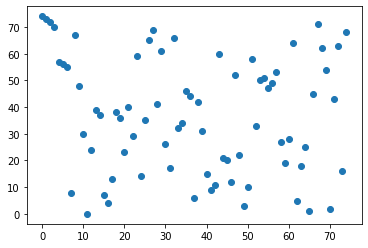

[10000] [[500, [74, 73, 72, 71, 70, 66, 55, 0, 44, 11, 21, 18, 6, 41, 68, 53, 69, 20, 24, 52, 35, 17, 37, 57, 48, 46, 16, 4, 13, 22, 59, 58, 49, 63, 31, 15, 65, 60, 54, 40, 7, 67, 38, 28, 5, 30, 33, 39, 26, 12, 45, 62, 51, 34, 8, 19, 14, 23, 32, 56, 61, 50, 25, 1, 10, 43, 3, 64, 2, 29, 47, 42, 36, 9, 27]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


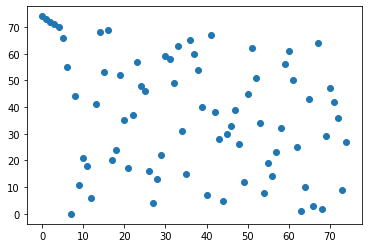

[15000] [[500, [74, 73, 72, 71, 70, 69, 66, 68, 58, 47, 11, 0, 44, 18, 32, 21, 2, 4, 7, 52, 5, 53, 51, 28, 1, 49, 41, 8, 27, 17, 42, 63, 64, 22, 24, 39, 31, 34, 15, 62, 16, 36, 59, 3, 57, 26, 25, 48, 65, 29, 13, 55, 43, 46, 6, 50, 40, 54, 12, 23, 56, 38, 30, 20, 60, 61, 67, 35, 37, 33, 45, 10, 19, 14, 9]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


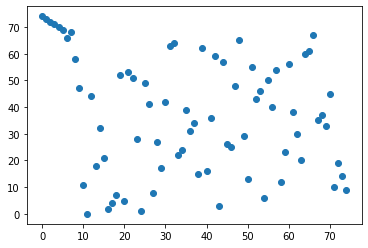

[20000] [[500, [74, 73, 72, 71, 70, 69, 68, 55, 6, 0, 17, 44, 18, 21, 35, 41, 64, 52, 26, 61, 51, 4, 46, 53, 48, 65, 15, 5, 14, 29, 54, 37, 57, 47, 27, 10, 25, 40, 50, 3, 67, 31, 11, 58, 43, 66, 32, 13, 1, 42, 34, 16, 33, 30, 24, 22, 23, 2, 20, 49, 63, 60, 7, 38, 56, 28, 12, 39, 8, 62, 19, 45, 36, 59, 9]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


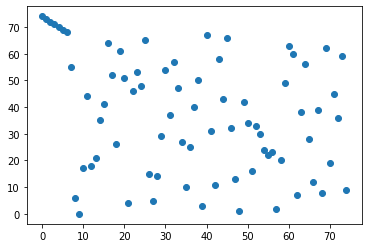

[25000] [[500, [74, 73, 72, 71, 70, 69, 68, 66, 58, 47, 44, 11, 40, 0, 18, 32, 2, 4, 7, 52, 5, 53, 51, 21, 39, 28, 49, 41, 27, 17, 42, 63, 64, 22, 10, 24, 31, 8, 34, 62, 29, 1, 55, 33, 43, 46, 6, 25, 20, 65, 13, 37, 54, 30, 45, 15, 57, 67, 56, 48, 61, 12, 38, 59, 23, 14, 19, 36, 50, 26, 16, 35, 3, 9, 60]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


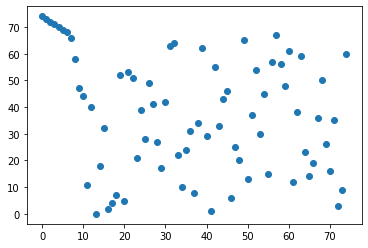

[30000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 57, 55, 30, 17, 44, 61, 28, 35, 64, 6, 52, 26, 16, 18, 4, 0, 41, 63, 46, 47, 50, 10, 5, 21, 58, 49, 59, 13, 20, 65, 3, 43, 33, 22, 19, 8, 40, 32, 23, 53, 60, 48, 15, 14, 27, 29, 25, 54, 37, 56, 2, 31, 11, 51, 7, 34, 62, 12, 24, 42, 45, 39, 36, 1, 38, 9]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


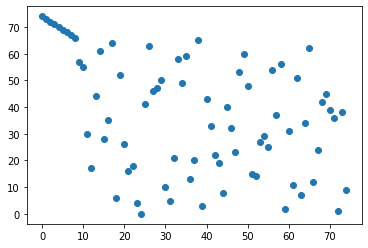

[35000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 57, 61, 33, 0, 28, 5, 7, 21, 44, 55, 17, 25, 64, 32, 4, 26, 40, 16, 51, 63, 54, 23, 3, 53, 48, 65, 15, 14, 29, 37, 47, 27, 10, 50, 22, 58, 11, 18, 6, 52, 13, 41, 34, 31, 59, 46, 1, 60, 38, 8, 19, 43, 20, 35, 2, 49, 42, 24, 39, 30, 62, 12, 56, 45, 36, 9]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


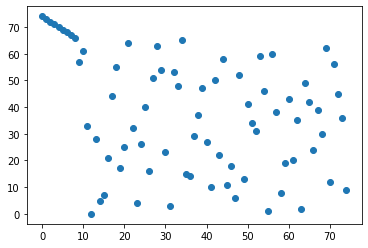

[40000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 64, 58, 47, 40, 0, 18, 32, 2, 41, 11, 3, 21, 44, 29, 49, 24, 13, 51, 34, 16, 54, 31, 4, 59, 52, 10, 65, 5, 6, 50, 42, 61, 53, 33, 30, 63, 7, 1, 8, 55, 57, 25, 28, 35, 60, 38, 37, 12, 62, 36, 27, 22, 17, 46, 26, 9, 19, 39, 43, 23, 48, 20, 15, 14, 56, 45]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


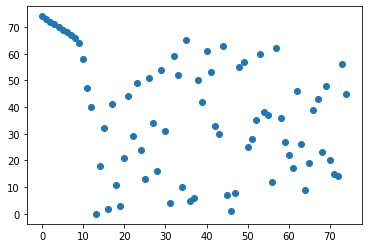

[45000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 64, 58, 47, 40, 0, 18, 32, 2, 41, 11, 3, 21, 44, 29, 49, 24, 13, 51, 34, 57, 55, 30, 17, 28, 35, 6, 52, 63, 26, 4, 16, 39, 50, 10, 5, 15, 59, 20, 25, 1, 62, 46, 56, 7, 53, 36, 42, 65, 43, 33, 22, 19, 8, 23, 60, 48, 14, 27, 54, 37, 12, 31, 38, 61, 9, 45]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


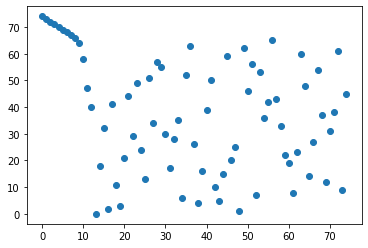

[50000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 61, 33, 0, 28, 5, 45, 7, 21, 44, 55, 57, 63, 40, 1, 25, 58, 47, 30, 3, 18, 29, 11, 32, 62, 2, 4, 10, 41, 36, 52, 53, 51, 39, 26, 49, 27, 17, 42, 22, 46, 8, 64, 24, 6, 48, 13, 16, 31, 59, 50, 34, 43, 20, 35, 37, 54, 12, 14, 15, 60, 56, 38, 23, 19, 9]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


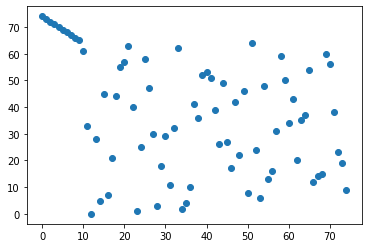

[55000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 61, 33, 28, 36, 5, 45, 7, 25, 21, 55, 57, 63, 40, 1, 58, 60, 47, 30, 3, 18, 4, 12, 29, 11, 2, 38, 8, 10, 41, 27, 51, 53, 16, 31, 59, 39, 52, 22, 32, 17, 35, 64, 26, 6, 37, 46, 0, 62, 15, 49, 48, 20, 42, 13, 34, 19, 54, 14, 50, 24, 44, 43, 23, 56, 9]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


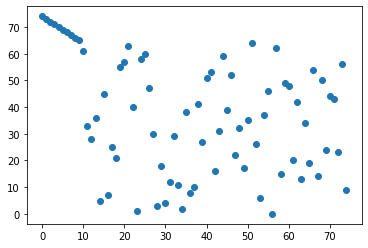

[60000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 61, 33, 36, 5, 45, 7, 64, 49, 58, 47, 40, 0, 18, 32, 2, 11, 3, 21, 44, 29, 24, 13, 51, 34, 16, 54, 31, 4, 59, 52, 10, 50, 42, 53, 63, 1, 25, 30, 12, 8, 41, 57, 39, 22, 55, 17, 35, 48, 26, 27, 37, 46, 62, 15, 20, 28, 23, 43, 6, 60, 14, 19, 56, 9, 38]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


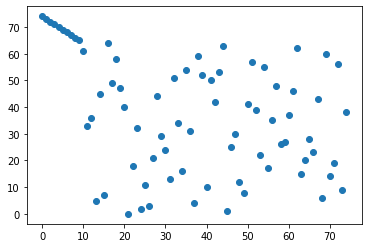

[65000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 58, 47, 40, 0, 18, 32, 2, 41, 11, 3, 21, 44, 29, 49, 24, 61, 33, 28, 36, 5, 45, 7, 25, 55, 57, 38, 13, 51, 34, 16, 54, 31, 14, 17, 26, 4, 63, 1, 30, 6, 46, 52, 20, 42, 50, 43, 22, 19, 23, 62, 60, 53, 35, 10, 8, 48, 15, 27, 56, 37, 9, 59, 39, 12]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


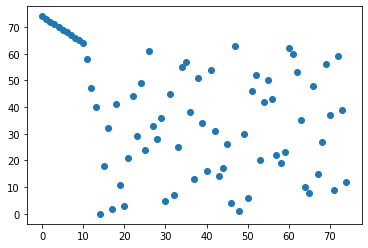

[70000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 58, 47, 40, 60, 0, 32, 2, 41, 11, 3, 18, 21, 44, 45, 29, 49, 24, 13, 51, 34, 16, 54, 31, 4, 61, 33, 28, 5, 57, 27, 14, 52, 10, 25, 39, 12, 63, 1, 30, 7, 26, 23, 48, 17, 15, 38, 37, 56, 55, 62, 9, 36, 6, 46, 50, 35, 59, 20, 43, 22, 19, 8, 53, 42]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


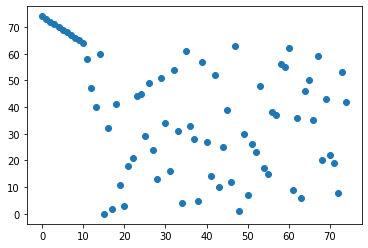

[75000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 58, 47, 40, 60, 0, 32, 2, 41, 11, 3, 18, 21, 44, 45, 29, 49, 24, 13, 51, 34, 16, 54, 31, 4, 61, 33, 28, 5, 57, 27, 14, 52, 10, 25, 39, 12, 63, 1, 30, 7, 26, 23, 48, 17, 15, 38, 37, 56, 55, 62, 9, 36, 6, 46, 50, 35, 59, 20, 43, 22, 19, 8, 53, 42]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


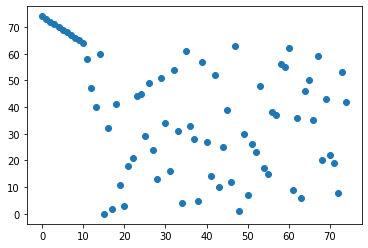

[80000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 58, 47, 40, 60, 0, 32, 2, 41, 11, 3, 18, 21, 44, 45, 29, 49, 24, 13, 51, 34, 16, 54, 31, 4, 61, 33, 28, 5, 57, 27, 14, 52, 10, 25, 39, 12, 63, 1, 30, 7, 26, 23, 48, 17, 15, 38, 37, 56, 55, 62, 9, 36, 6, 46, 50, 35, 59, 20, 43, 22, 19, 8, 53, 42]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


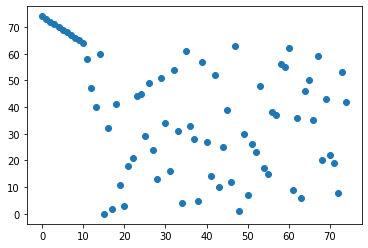

[85000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 58, 47, 40, 60, 0, 32, 2, 41, 11, 3, 18, 21, 44, 45, 29, 49, 24, 13, 51, 34, 16, 54, 31, 4, 61, 33, 28, 5, 57, 27, 14, 52, 10, 25, 39, 12, 63, 1, 30, 7, 26, 23, 48, 17, 15, 38, 37, 56, 55, 62, 9, 36, 6, 46, 50, 35, 59, 20, 43, 22, 19, 8, 53, 42]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


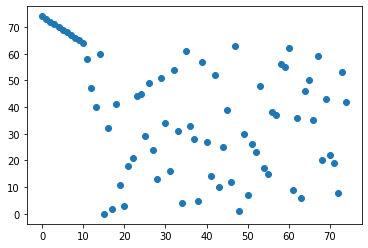

[90000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 58, 61, 33, 36, 5, 45, 7, 49, 47, 40, 0, 18, 32, 2, 11, 3, 21, 44, 29, 24, 13, 51, 34, 16, 54, 31, 4, 59, 52, 10, 50, 42, 53, 63, 1, 25, 30, 12, 8, 41, 57, 39, 22, 55, 17, 35, 48, 20, 28, 27, 38, 46, 19, 6, 14, 26, 60, 62, 37, 15, 43, 23, 9, 56]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


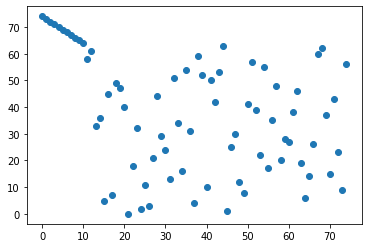

[95000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 58, 62, 40, 4, 0, 18, 2, 41, 27, 11, 35, 21, 44, 29, 24, 15, 33, 5, 63, 45, 25, 3, 12, 32, 30, 28, 10, 36, 57, 59, 61, 55, 49, 23, 7, 48, 51, 16, 8, 31, 38, 53, 13, 34, 52, 26, 47, 39, 6, 50, 56, 1, 20, 14, 37, 46, 54, 17, 60, 9, 43, 19, 22, 42]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


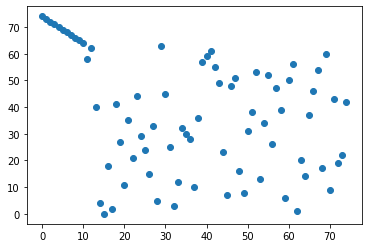

[100000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 47, 40, 0, 18, 32, 2, 41, 11, 3, 21, 44, 29, 49, 24, 61, 33, 28, 36, 5, 58, 45, 7, 25, 55, 57, 38, 13, 34, 16, 54, 31, 14, 17, 26, 9, 4, 63, 1, 30, 6, 46, 52, 20, 51, 42, 50, 43, 22, 19, 23, 60, 53, 35, 8, 10, 15, 48, 27, 56, 37, 12, 59, 39]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


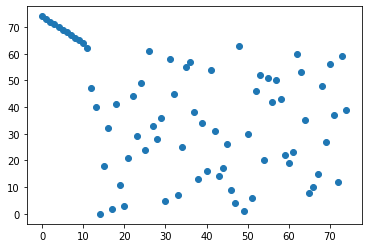

[105000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 47, 40, 0, 18, 32, 2, 41, 11, 3, 21, 44, 29, 49, 24, 61, 33, 28, 36, 5, 58, 45, 7, 25, 55, 57, 38, 13, 34, 16, 54, 31, 14, 17, 26, 9, 4, 63, 1, 30, 6, 46, 52, 20, 51, 42, 50, 43, 27, 35, 53, 15, 60, 12, 8, 37, 48, 59, 10, 22, 19, 56, 39, 23]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


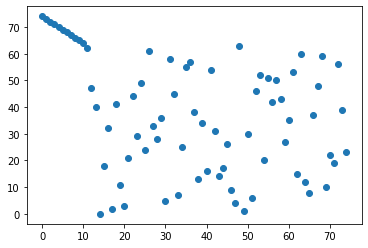

[110000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 47, 40, 0, 32, 2, 41, 11, 3, 21, 44, 30, 29, 58, 31, 23, 4, 35, 24, 25, 49, 33, 5, 61, 45, 57, 55, 63, 15, 13, 51, 16, 27, 59, 52, 10, 50, 36, 42, 53, 1, 54, 17, 14, 20, 7, 12, 37, 46, 60, 38, 8, 39, 26, 6, 28, 43, 22, 34, 19, 56, 18, 9, 48]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


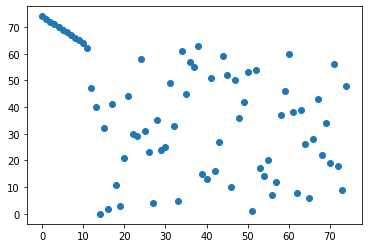

[115000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 47, 40, 0, 32, 2, 41, 11, 3, 21, 44, 30, 29, 58, 31, 23, 4, 35, 61, 18, 25, 33, 5, 45, 7, 57, 55, 63, 15, 28, 36, 49, 24, 13, 51, 56, 34, 16, 54, 59, 52, 10, 50, 22, 42, 53, 1, 12, 8, 60, 46, 20, 38, 27, 43, 39, 17, 48, 26, 37, 6, 9, 19, 14]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


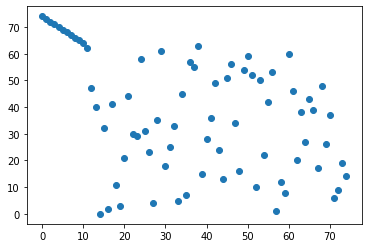

[120000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 47, 40, 18, 32, 2, 41, 3, 21, 44, 29, 0, 49, 24, 61, 33, 28, 36, 5, 39, 58, 45, 7, 50, 25, 55, 11, 4, 27, 35, 15, 63, 12, 30, 10, 57, 59, 23, 48, 51, 16, 8, 31, 38, 53, 13, 34, 52, 26, 6, 56, 1, 20, 14, 37, 46, 54, 17, 60, 42, 22, 9, 43, 19]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


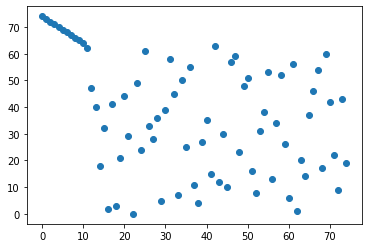

[125000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 58, 49, 47, 40, 0, 32, 2, 41, 54, 4, 11, 3, 35, 18, 21, 27, 29, 24, 15, 44, 59, 51, 25, 33, 5, 45, 61, 17, 46, 28, 22, 20, 7, 55, 52, 57, 12, 42, 30, 48, 10, 8, 6, 37, 13, 53, 16, 36, 1, 34, 38, 60, 14, 50, 31, 23, 26, 39, 56, 43, 63, 9, 19]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


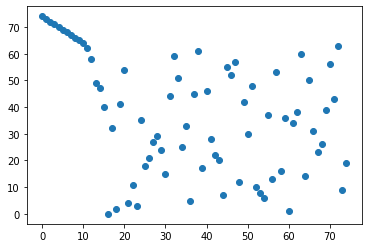

[130000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 58, 49, 47, 40, 0, 32, 2, 41, 54, 4, 11, 3, 35, 18, 21, 27, 29, 24, 15, 44, 59, 51, 25, 33, 5, 45, 61, 17, 46, 28, 22, 20, 7, 55, 52, 57, 12, 42, 30, 48, 10, 8, 6, 37, 13, 53, 16, 36, 1, 34, 38, 60, 14, 50, 31, 23, 26, 39, 56, 43, 63, 9, 19]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


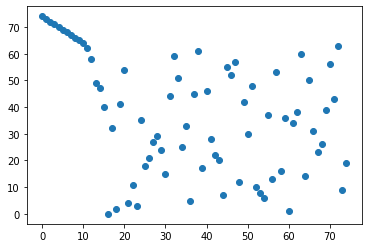

[135000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 58, 61, 33, 36, 5, 45, 7, 49, 47, 40, 0, 18, 32, 11, 3, 21, 44, 29, 2, 24, 31, 4, 28, 41, 27, 57, 60, 35, 25, 15, 9, 50, 37, 46, 13, 14, 53, 63, 55, 1, 30, 12, 51, 34, 54, 26, 22, 38, 16, 17, 6, 52, 10, 59, 23, 48, 8, 39, 20, 19, 42, 43, 56]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


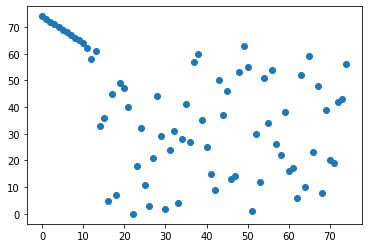

[140000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 63, 47, 40, 0, 18, 32, 41, 11, 2, 37, 3, 21, 44, 29, 38, 49, 24, 61, 33, 28, 36, 5, 58, 45, 7, 4, 27, 35, 13, 51, 34, 56, 25, 60, 9, 17, 16, 55, 57, 20, 54, 31, 15, 52, 46, 22, 42, 30, 48, 10, 8, 6, 53, 14, 26, 50, 39, 23, 12, 1, 59, 19, 43]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


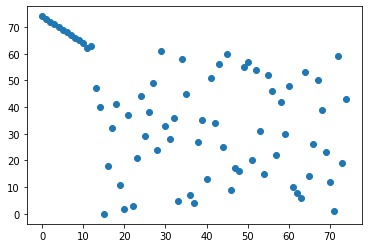

[145000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 63, 47, 40, 0, 18, 32, 41, 11, 2, 37, 3, 21, 44, 29, 38, 49, 24, 61, 33, 28, 36, 5, 58, 45, 7, 4, 27, 35, 13, 51, 34, 56, 25, 60, 9, 17, 16, 55, 57, 20, 54, 31, 15, 52, 46, 22, 42, 30, 48, 10, 8, 6, 53, 14, 26, 50, 39, 23, 12, 1, 59, 19, 43]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


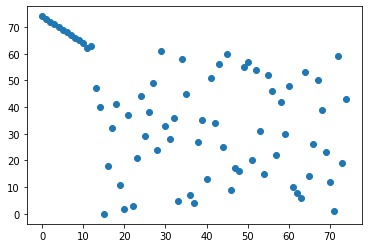

[150000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 63, 47, 40, 0, 18, 32, 41, 11, 2, 37, 3, 21, 44, 29, 38, 49, 24, 61, 33, 28, 36, 5, 58, 45, 7, 4, 27, 35, 13, 51, 34, 56, 25, 60, 9, 17, 16, 55, 57, 20, 54, 31, 15, 52, 46, 22, 42, 30, 48, 10, 8, 6, 53, 14, 26, 50, 39, 23, 12, 1, 59, 19, 43]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


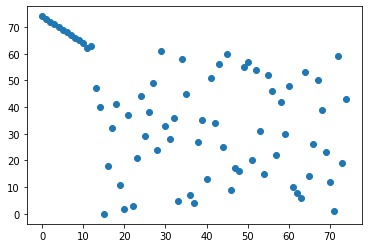

[155000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 63, 47, 40, 0, 18, 32, 41, 11, 2, 37, 3, 21, 44, 29, 38, 49, 24, 61, 33, 28, 36, 5, 58, 45, 7, 4, 27, 35, 13, 51, 34, 56, 25, 60, 9, 17, 16, 55, 57, 20, 54, 31, 15, 52, 46, 22, 42, 30, 48, 10, 8, 6, 53, 14, 26, 50, 39, 23, 12, 1, 59, 19, 43]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


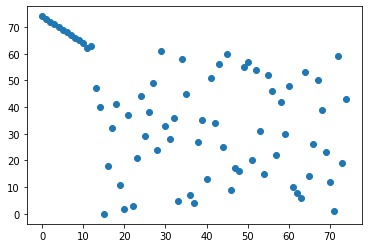

[160000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 63, 47, 40, 0, 18, 32, 42, 41, 11, 2, 37, 3, 21, 44, 29, 38, 49, 24, 61, 33, 28, 36, 5, 58, 45, 7, 4, 27, 35, 13, 51, 34, 56, 25, 60, 9, 17, 16, 55, 57, 20, 54, 31, 15, 52, 46, 22, 30, 48, 10, 8, 6, 53, 14, 26, 50, 39, 23, 12, 1, 59, 19, 43]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


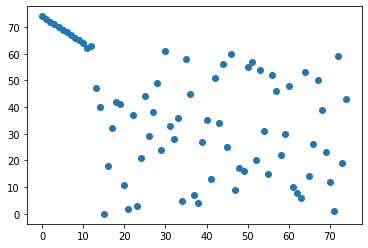

[165000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 63, 47, 40, 0, 18, 32, 42, 41, 11, 2, 37, 3, 21, 44, 29, 38, 49, 24, 61, 33, 28, 36, 5, 58, 45, 7, 4, 27, 35, 13, 51, 34, 56, 25, 60, 9, 17, 16, 55, 57, 20, 54, 31, 15, 52, 46, 22, 30, 48, 10, 8, 6, 53, 14, 26, 50, 39, 23, 12, 1, 59, 19, 43]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


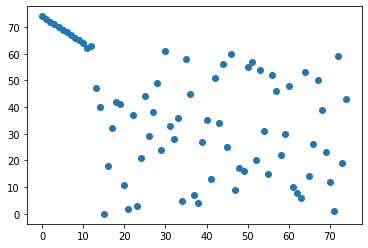

[170000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 40, 0, 18, 32, 42, 41, 11, 2, 37, 3, 47, 21, 44, 29, 38, 49, 61, 33, 28, 36, 5, 58, 45, 7, 4, 27, 35, 13, 51, 34, 43, 56, 25, 60, 9, 17, 16, 57, 20, 54, 31, 15, 52, 46, 22, 24, 30, 48, 62, 10, 8, 55, 6, 53, 14, 26, 50, 39, 23, 12, 1, 59, 19]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


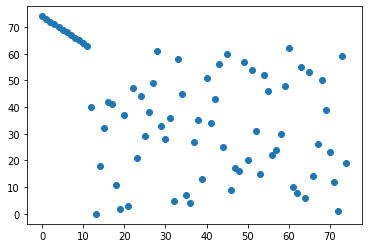

[175000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 40, 0, 18, 32, 42, 41, 11, 37, 3, 47, 21, 55, 29, 38, 49, 61, 33, 2, 59, 28, 36, 5, 58, 45, 7, 4, 27, 17, 35, 13, 51, 34, 43, 56, 25, 62, 60, 16, 57, 9, 20, 54, 8, 24, 48, 23, 1, 53, 44, 22, 15, 52, 50, 31, 14, 26, 30, 6, 46, 12, 19, 10, 39]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


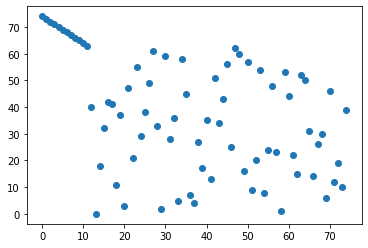

[180000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 40, 0, 18, 32, 42, 51, 41, 11, 37, 3, 47, 21, 44, 29, 38, 49, 61, 33, 28, 36, 2, 5, 58, 7, 4, 27, 35, 13, 34, 43, 56, 25, 60, 9, 17, 16, 57, 20, 54, 31, 15, 52, 46, 22, 24, 30, 48, 62, 10, 8, 55, 6, 53, 14, 45, 26, 50, 39, 23, 12, 1, 19, 59]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


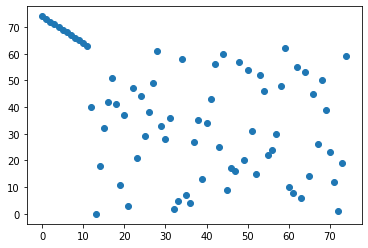

[185000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 58, 4, 0, 18, 2, 41, 27, 11, 35, 21, 44, 29, 24, 15, 33, 5, 45, 25, 3, 12, 32, 30, 28, 10, 36, 57, 59, 61, 55, 49, 23, 7, 48, 51, 16, 8, 40, 31, 17, 38, 53, 13, 34, 52, 26, 47, 39, 56, 20, 54, 14, 1, 6, 46, 42, 50, 43, 22, 19, 60, 9, 37]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


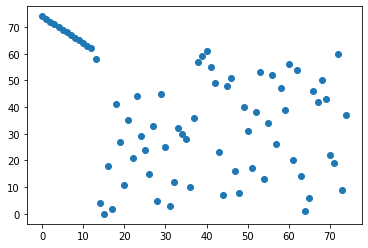

[190000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 58, 4, 0, 18, 2, 41, 27, 11, 35, 21, 44, 29, 24, 15, 33, 5, 45, 25, 3, 12, 32, 30, 28, 10, 36, 57, 59, 61, 55, 49, 23, 7, 48, 51, 16, 8, 40, 31, 17, 38, 53, 13, 34, 52, 26, 47, 39, 56, 20, 54, 14, 1, 6, 46, 42, 50, 43, 22, 19, 60, 9, 37]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


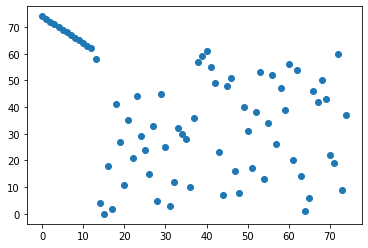

[195000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 58, 4, 0, 18, 2, 41, 27, 11, 35, 21, 44, 29, 24, 15, 33, 5, 45, 25, 3, 12, 32, 30, 28, 10, 36, 57, 59, 61, 55, 49, 23, 7, 48, 51, 16, 8, 40, 31, 17, 38, 53, 13, 34, 52, 26, 47, 39, 56, 20, 54, 14, 1, 6, 46, 42, 50, 43, 22, 19, 60, 9, 37]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


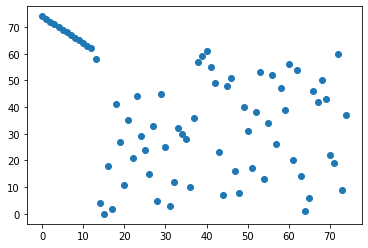

[200000] [[500, [74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 58, 4, 0, 18, 2, 41, 45, 27, 11, 35, 21, 44, 29, 24, 15, 33, 5, 25, 3, 12, 32, 30, 28, 10, 36, 57, 59, 61, 55, 49, 23, 7, 48, 51, 8, 40, 31, 17, 38, 53, 13, 34, 52, 26, 47, 16, 39, 56, 20, 54, 14, 1, 6, 46, 42, 50, 43, 22, 19, 60, 37, 9]]] [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [500]


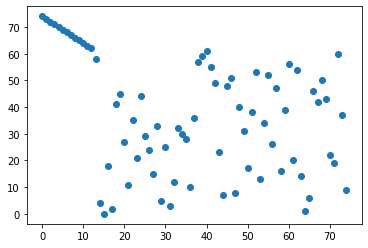

In [16]:
EAMP = Evolutionary_Algorithm2_Many_Patterns(75,10,500)

In [ ]:
EAMP2 = Evolutionary_Algorithm2_Many_Patterns(75,10,10000)